In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

In [19]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [20]:
train_dataset = train.flow_from_directory(r"D:\code\data\train", 
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = "binary")

Found 274 images belonging to 2 classes.


In [21]:
validation_dataset = validation.flow_from_directory(r"D:\code\data\validation", 
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = "binary")

Found 60 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'female': 0, 'male': 1}

In [23]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(1, activation = 'sigmoid'),
                                   ])

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [25]:
model_fit = model.fit_generator(train_dataset, 
                      steps_per_epoch = 50, 
                      epochs = 200, 
                      validation_data = validation_dataset)

Epoch 1/200
50/50 [==============================] - 13s 260ms/step - loss: 1.7051 - acc: 0.5065 - val_loss: 4.0389 - val_acc: 0.5000
Epoch 2/200
50/50 [==============================] - 12s 232ms/step - loss: 0.8607 - acc: 0.5600 - val_loss: 0.6393 - val_acc: 0.6500
Epoch 3/200
50/50 [==============================] - 12s 232ms/step - loss: 0.7116 - acc: 0.6999 - val_loss: 0.5782 - val_acc: 0.8000
Epoch 4/200
50/50 [==============================] - 12s 233ms/step - loss: 2.8410 - acc: 0.6600 - val_loss: 0.5577 - val_acc: 0.7667
Epoch 5/200
50/50 [==============================] - 12s 232ms/step - loss: 0.4704 - acc: 0.8333 - val_loss: 0.6815 - val_acc: 0.7167
Epoch 6/200
50/50 [==============================] - 12s 233ms/step - loss: 0.4554 - acc: 0.7867 - val_loss: 0.8994 - val_acc: 0.6667
Epoch 7/200
50/50 [==============================] - 12s 234ms/step - loss: 0.3826 - acc: 0.8666 - val_loss: 0.5691 - val_acc: 0.7167
Epoch 8/200
50/50 [==============================] - 12s 230ms

50/50 [==============================] - 12s 234ms/step - loss: 1.1011e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 61/200
50/50 [==============================] - 12s 237ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 62/200
50/50 [==============================] - 12s 234ms/step - loss: 1.1063e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 63/200
50/50 [==============================] - 12s 236ms/step - loss: 1.0999e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 64/200
50/50 [==============================] - 12s 239ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 65/200
50/50 [==============================] - 12s 235ms/step - loss: 1.1076e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 66/200
50/50 [==============================] - 12s 237ms/step - loss: 1.0999e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 67/200
50/50 [====================

Epoch 119/200
50/50 [==============================] - 12s 242ms/step - loss: 1.0922e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 120/200
50/50 [==============================] - 12s 240ms/step - loss: 1.1101e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 121/200
50/50 [==============================] - 12s 242ms/step - loss: 1.0999e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 122/200
50/50 [==============================] - 12s 241ms/step - loss: 1.0935e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 123/200
50/50 [==============================] - 12s 242ms/step - loss: 1.1089e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 124/200
50/50 [==============================] - 12s 240ms/step - loss: 1.1102e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 125/200
50/50 [==============================] - 12s 243ms/step - loss: 1.0909e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 126/200
50/50 

50/50 [==============================] - 12s 250ms/step - loss: 1.0961e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 178/200
50/50 [==============================] - 12s 243ms/step - loss: 1.0986e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 179/200
50/50 [==============================] - 12s 245ms/step - loss: 1.1114e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 180/200
50/50 [==============================] - 12s 246ms/step - loss: 1.0973e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 181/200
50/50 [==============================] - 12s 249ms/step - loss: 1.1050e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 182/200
50/50 [==============================] - 12s 247ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 183/200
50/50 [==============================] - 12s 248ms/step - loss: 1.0999e-07 - acc: 1.0000 - val_loss: 3.5566 - val_acc: 0.7000
Epoch 184/200
50/50 [=============

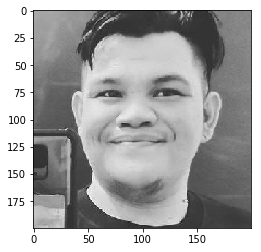

Male


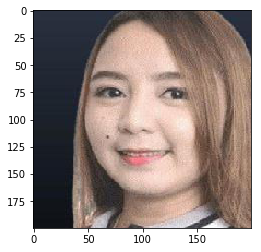

Female


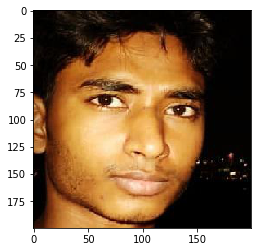

Female


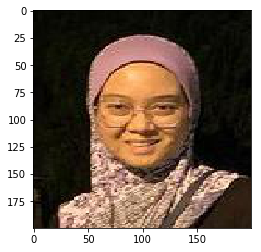

Female


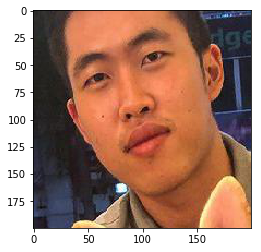

Male


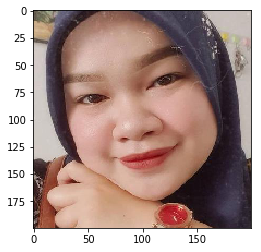

Male


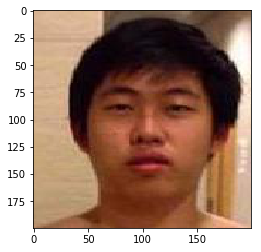

Male


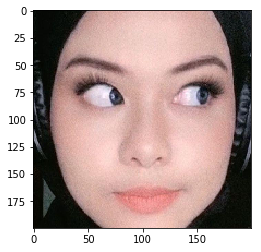

Female


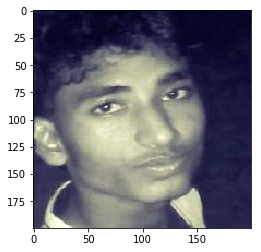

Female


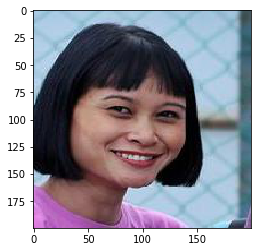

Female


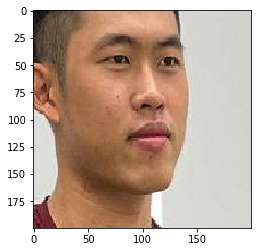

Male


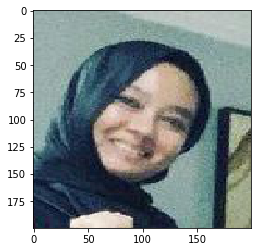

Female


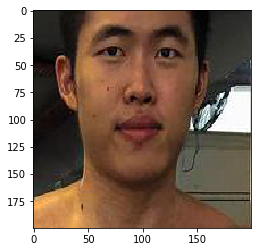

Male


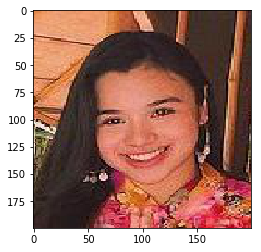

Female


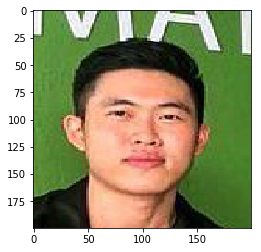

Female


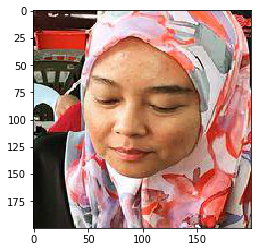

Female


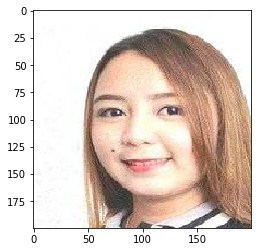

Female


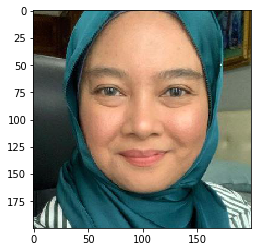

Female


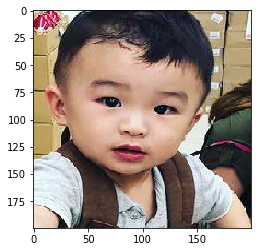

Male


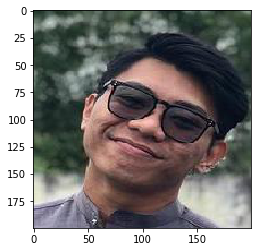

Male


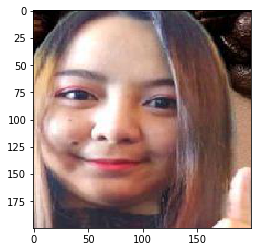

Female


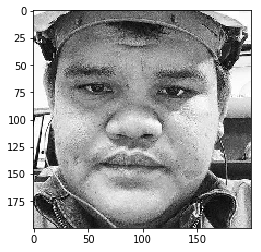

Female


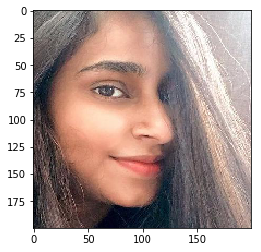

Female


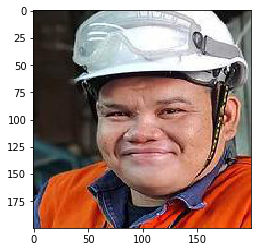

Female


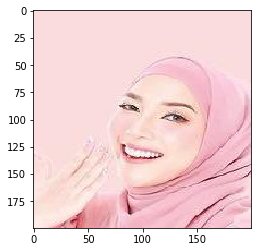

Male


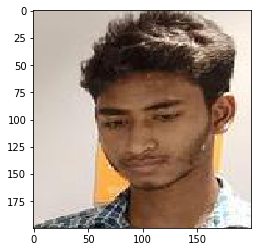

Male


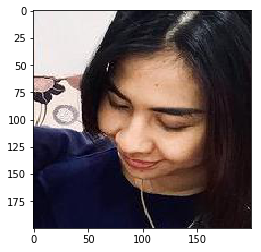

Female


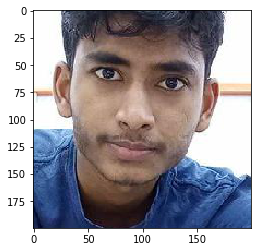

Male


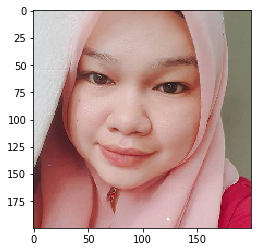

Male


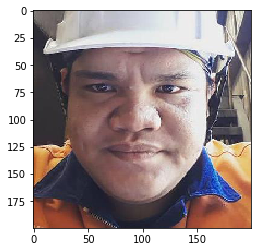

Male


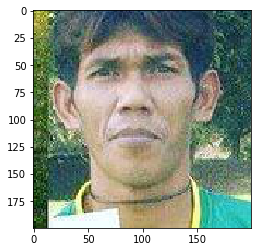

Male


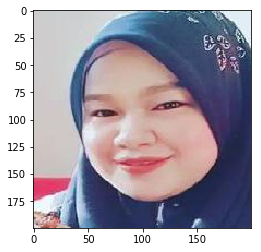

Female


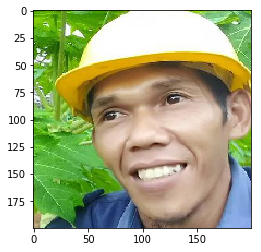

Male


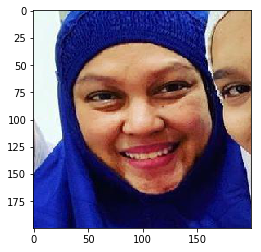

Male


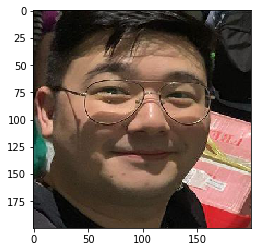

Female


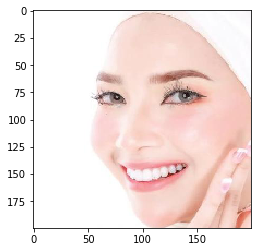

Female


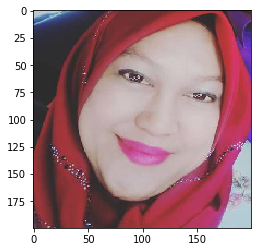

Female


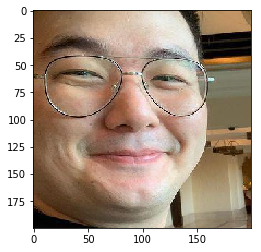

Female


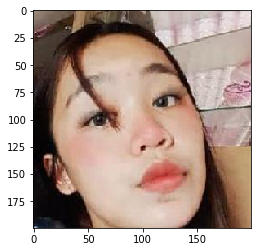

Female


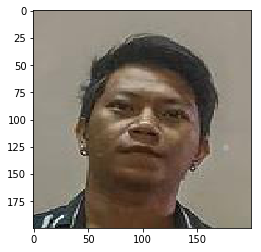

Male


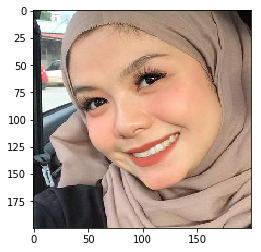

Female


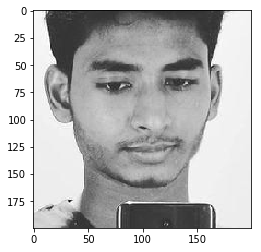

Male


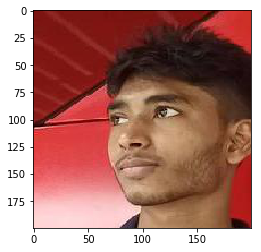

Female


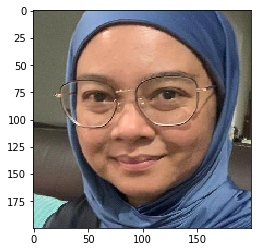

Female


In [26]:
test_path = r"D:\code\data\test"

for file in os.listdir(test_path):
    if file.endswith(".jpg"):
        imgPath = imgPath = r"" + test_path + "/" + file + ""
        img = image.load_img(imgPath, target_size=(200,200))
        plt.imshow(img)
        plt.show()
        
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        if val == 0:
            print("Female")
        else:
            print("Male")
        